In [1]:
import prepare
import acquire
import exploration
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import os
import split
import matplotlib.pyplot as plt
import itertools

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import modeling

alpha = 0.05

In [2]:
titanic_df, categories, quant_cols = prepare.acquire_prep_titanic()
titanic_df

train, validate, test = split.train_validate_test_split(titanic_df, 'survived')
train.head()

['age', 'fare']


,survived,pclass,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,sex_male
583,0,1,36.0,0,0,40.1250,1,0,0,1
165,1,3,9.0,0,2,20.5250,0,0,1,1
50,0,3,7.0,4,1,39.6875,0,0,1,1
259,1,2,50.0,0,1,26.0000,0,0,1,0
306,1,1,NaN,0,0,110.8833,1,0,0,0


In [3]:
for col in titanic_df.columns:
    print(titanic_df[col].value_counts())
    print(f'NaN: {titanic_df[col].isna().sum()}')
    
    

0    549
1    342
Name: survived, dtype: int64
NaN: 0
3    491
1    216
2    184
Name: pclass, dtype: int64
NaN: 0
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64
NaN: 177
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
NaN: 0
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
NaN: 0
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64
NaN: 0
1    537
0    354
Name: alone, dtype: int64
NaN: 0
0    814
1     77
Name: embarked_Q, dtype: int64
NaN: 0
1    644
0    247
Name: embarked_S, dtype: int64
NaN: 0
1    577
0    314
Name: sex_male, dtype: int64
NaN: 0


In [4]:
imputer =SimpleImputer(missing_values= np.NaN, strategy='most_frequent')
imputer = imputer.fit(train[['age']])

train[['age']] = imputer.transform(train[['age']])
validate[['age']] = imputer.transform(validate[['age']])
test[['age']] = imputer.transform(test[['age']])

train.isna().sum()


survived      0
pclass        0
age           0
sibsp         0
parch         0
fare          0
alone         0
embarked_Q    0
embarked_S    0
sex_male      0
dtype: int64

In [5]:
x_train = train.drop(columns=['survived'])
y_train = train.survived

x_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

x_test = test.drop(columns=['survived'])
y_test = test.survived

In [6]:
# create object
clf = DecisionTreeClassifier(max_depth=4, random_state=123)

In [7]:
# fit model
clf = clf.fit(x_train, y_train)

[Text(333.68399999999997, 342.46799999999996, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(159.588, 266.364, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(58.032, 190.26, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(29.016, 114.156, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(87.048, 114.156, 'fare <= 28.856\ngini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = 1'),
 Text(58.032, 38.051999999999964, 'gini = 0.133\nsamples = 42\nvalue = [3, 39]\nclass = 1'),
 Text(116.064, 38.051999999999964, 'gini = 0.0\nsamples = 51\nvalue = [0, 51]\nclass = 1'),
 Text(261.144, 190.26, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = 1'),
 Text(203.112, 114.156, 'age <= 35.0\ngini = 0.476\nsamples = 69\nvalue = [27, 42]\nclass = 1'),
 Text(174.096, 38.051999999999964, 'gini = 0.455\nsamples = 63\nvalue = [22, 41]\nclass = 1'),
 Text(232.128, 38.0519999999

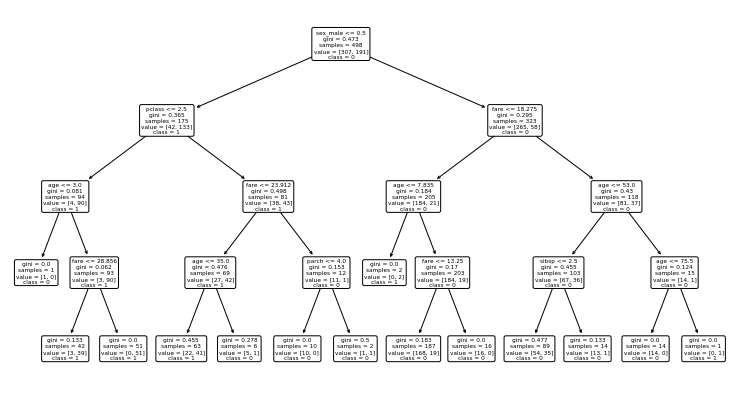

In [8]:
# visualize
plt.figure(figsize=(13,7))
plot_tree(clf, feature_names=x_train.columns, class_names=clf.classes_.astype('str'),
         rounded=True)

In [9]:
# predicitons on train observations

y_pred = clf.predict(x_train)
y_pred[:5]

array([0, 0, 0, 1, 1])

In [10]:
# estimate probability
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba[:5]

array([[0.60674157, 0.39325843],
       [0.60674157, 0.39325843],
       [0.92857143, 0.07142857],
       [0.07142857, 0.92857143],
       [0.        , 1.        ]])

In [11]:
# computing accuracy
print(f'Accuracy of Decision Tree on training set: {clf.score(x_train,y_train)}')

Accuracy of Decision Tree on training set: 0.8353413654618473


In [12]:
# confusion matrix
confusion_matrix(y_train, y_pred)

array([[282,  25],
       [ 57, 134]])

In [13]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [14]:
print(f'Accuracy of Decision Tree on validate: {clf.score(x_validate, y_validate)}')

Accuracy of Decision Tree on validate: 0.794392523364486


In [15]:
y_pred = clf.predict(x_validate)

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       132
           1       0.77      0.66      0.71        82

    accuracy                           0.79       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.79      0.79      0.79       214



In [16]:
titanic_df, categories, quant_cols = prepare.acquire_prep_titanic()
train, validate, test = split.train_validate_test_split(titanic_df, 'survived')

modeling.impute_value(train, validate, test, col_names=['age'])


train = exploration.dataset_reduction(train, 'survived', categories, quant_cols)
validate = validate[train.columns]

['age', 'fare']
Categories related to survived:
pclass
sibsp
parch
alone
embarked_S
sex_male


In [17]:
train

,age,fare,pclass,sibsp,parch,alone,embarked_S,sex_male,survived
583,36.0,40.1250,1,0,0,1,0,1,0
165,9.0,20.5250,3,0,2,0,1,1,1
50,7.0,39.6875,3,4,1,0,1,1,0
259,50.0,26.0000,2,0,1,0,1,0,1
306,28.0,110.8833,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
313,28.0,7.8958,3,0,0,1,1,1,0
636,32.0,7.9250,3,0,0,1,1,1,0
222,51.0,8.0500,3,0,0,1,1,1,0
485,28.0,25.4667,3,3,1,0,1,0,0


In [18]:
validate

,age,fare,pclass,sibsp,parch,alone,embarked_S,sex_male,survived
610,39.0,31.2750,3,1,5,0,1,0,0
424,18.0,20.2125,3,1,1,0,1,1,0
568,28.0,7.2292,3,0,0,1,0,1,0
334,28.0,133.6500,1,1,0,0,1,0,1
101,28.0,7.8958,3,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
176,28.0,25.4667,3,3,1,0,1,1,0
372,19.0,8.0500,3,0,0,1,1,1,0
737,35.0,512.3292,1,0,0,1,0,1,1
862,48.0,25.9292,1,0,0,1,1,0,1


In [19]:
results, reports = modeling.decision_tree(train, validate, test, 'survived', depth=8)
results

,depth,min_samples_leaf,train_accuracy,validate_accuracy,difference,percent_diff,classification_report_validate,classification_report_train
0,1,,0.799197,0.761682,0.037515,4.69,precision recall f1-score ...,precision recall f1-score ...
1,2,,0.799197,0.761682,0.037515,4.69,precision recall f1-score ...,precision recall f1-score ...
2,3,,0.825301,0.799065,0.026236,3.18,precision recall f1-score ...,precision recall f1-score ...
3,4,,0.835341,0.794393,0.040949,4.90,precision recall f1-score ...,precision recall f1-score ...
4,5,,0.853414,0.803738,0.049675,5.82,precision recall f1-score ...,precision recall f1-score ...
5,6,,0.867470,0.794393,0.073077,8.42,precision recall f1-score ...,precision recall f1-score ...
6,7,,0.879518,0.799065,0.080453,9.15,precision recall f1-score ...,precision recall f1-score ...
7,8,,0.905622,0.813084,0.092538,10.22,precision recall f1-score ...,precision recall f1-score ...


In [20]:

models_df = modeling.make_model_results_into_df(results)
summary = modeling.summary_results(models_df)
summary = summary[summary.percent_diff < 10]
summary


,depth,min_samples_leaf,train_accuracy,validate_accuracy,difference,percent_diff
0,1,,0.799197,0.761682,0.037515,4.69
1,2,,0.799197,0.761682,0.037515,4.69
2,3,,0.825301,0.799065,0.026236,3.18
3,4,,0.835341,0.794393,0.040949,4.90
4,5,,0.853414,0.803738,0.049675,5.82
5,6,,0.867470,0.794393,0.073077,8.42
6,7,,0.879518,0.799065,0.080453,9.15


In [21]:
print(f'difference mean: {summary.difference.mean()}')
print(f'percent differnece mean: {summary.percent_diff.mean()}')


difference mean: 0.04934557991646154
percent differnece mean: 5.835714285714286


In [22]:
telco_df, categories, quant_cols = prepare.acquire_prep_telco()
target_var = 'churn'
print(telco_df.info())

train, validate, test = split.train_validate_test_split(telco_df, target_var)


train = exploration.dataset_reduction(train, target_var, categories, quant_cols)
validate = validate[train.columns]
train

multiple_lines
online_security
online_backup
device_protection
tech_support
streaming_tv
streaming_movies
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   is_female                             7032 non-null   int64  
 1   senior_citizen                        7032 non-null   int64  
 2   partner                               7032 non-null   int64  
 3   dependents                            7032 non-null   int64  
 4   tenure                                7032 non-null   float64
 5   phone_service                         7032 non-null   int64  
 6   paperless_billing                     7032 non-null   int64  
 7   monthly_charges                       7032 non-null   float64
 8   total_charges                         7032 non-null   float64
 9   churn                                 7032 no

,tenure,monthly_charges,total_charges,senior_citizen,partner,dependents,paperless_billing,multiple_lines_1.0,online_security_1.0,online_security_None,...,streaming_movies_1.0,streaming_movies_None,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_One year,contract_type_Two year,churn
5919,58.0,71.10,4299.20,0,0,0,1,1,1,0,...,0,0,0,0,1,0,0,1,0,0
1915,71.0,85.45,6028.95,0,0,1,1,1,1,0,...,0,0,1,0,1,0,0,1,0,0
5054,35.0,25.75,882.55,0,1,1,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
2355,1.0,19.20,19.20,0,1,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
6279,20.0,54.00,1055.90,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,24.0,88.95,2072.75,0,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3763,10.0,100.25,1064.65,0,1,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
3444,22.0,25.25,555.40,0,1,1,0,1,0,1,...,0,1,0,1,1,0,0,0,1,0
1002,22.0,89.10,1949.40,0,0,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [23]:
validate

,tenure,monthly_charges,total_charges,senior_citizen,partner,dependents,paperless_billing,multiple_lines_1.0,online_security_1.0,online_security_None,...,streaming_movies_1.0,streaming_movies_None,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_One year,contract_type_Two year,churn
816,27.0,95.00,2462.55,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
1488,71.0,89.30,6388.65,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
4796,44.0,54.00,2440.25,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
3213,27.0,19.90,550.10,0,1,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
5026,62.0,20.05,1263.90,0,1,1,0,0,0,1,...,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,62.0,89.10,5411.65,0,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1279,48.0,106.10,5082.80,0,0,0,1,1,0,0,...,1,0,1,0,1,0,0,1,0,1
2281,72.0,116.60,8337.45,0,1,1,1,1,1,0,...,1,0,1,0,0,0,0,0,1,0
2536,17.0,80.85,1445.95,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [24]:
results, reports = modeling.decision_tree(train, validate, test, target_var, depth=8)
results

,depth,min_samples_leaf,train_accuracy,validate_accuracy,difference,percent_diff,classification_report_validate,classification_report_train
0,1,,0.734315,0.734005,0.000311,0.04,precision recall f1-score ...,precision recall f1-score ...
1,2,,0.794006,0.776066,0.017939,2.26,precision recall f1-score ...,precision recall f1-score ...
2,3,,0.794006,0.776066,0.017939,2.26,precision recall f1-score ...,precision recall f1-score ...
3,4,,0.800610,0.777844,0.022766,2.84,precision recall f1-score ...,precision recall f1-score ...
4,5,,0.806960,0.776066,0.030893,3.83,precision recall f1-score ...,precision recall f1-score ...
5,6,,0.816866,0.777844,0.039022,4.78,precision recall f1-score ...,precision recall f1-score ...
6,7,,0.832360,0.763033,0.069326,8.33,precision recall f1-score ...,precision recall f1-score ...
7,8,,0.841504,0.761848,0.079655,9.47,precision recall f1-score ...,precision recall f1-score ...


In [25]:
summary = modeling.summary_results(results)
summary

,depth,min_samples_leaf,train_accuracy,validate_accuracy,difference,percent_diff
0,1,,0.734315,0.734005,0.000311,0.04
1,2,,0.794006,0.776066,0.017939,2.26
2,3,,0.794006,0.776066,0.017939,2.26
3,4,,0.800610,0.777844,0.022766,2.84
4,5,,0.806960,0.776066,0.030893,3.83
5,6,,0.816866,0.777844,0.039022,4.78
6,7,,0.832360,0.763033,0.069326,8.33
7,8,,0.841504,0.761848,0.079655,9.47


In [26]:
print(f'Mean difference: {summary.difference.mean()}')
print(f'Mean percent Diff: {summary.percent_diff.mean()}')

Mean difference: 0.03473154117516765
Mean percent Diff: 4.22625


# Random Forests Exercsises

In [27]:
titanic_df, categories, quant_cols = prepare.acquire_prep_titanic()
target_var = 'survived'
train, validate, test = split.train_validate_test_split(titanic_df, target_var)

modeling.impute_value(train, validate, test, col_names=['age'])


train = exploration.dataset_reduction(train, target_var, categories, quant_cols)
validate = validate[train.columns]
train

['age', 'fare']
Categories related to survived:
pclass
sibsp
parch
alone
embarked_S
sex_male


,age,fare,pclass,sibsp,parch,alone,embarked_S,sex_male,survived
583,36.0,40.1250,1,0,0,1,0,1,0
165,9.0,20.5250,3,0,2,0,1,1,1
50,7.0,39.6875,3,4,1,0,1,1,0
259,50.0,26.0000,2,0,1,0,1,0,1
306,28.0,110.8833,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
313,28.0,7.8958,3,0,0,1,1,1,0
636,32.0,7.9250,3,0,0,1,1,1,0
222,51.0,8.0500,3,0,0,1,1,1,0
485,28.0,25.4667,3,3,1,0,1,0,0


In [28]:
results, reports = modeling.random_forests(train, validate, test, target_var, 
                                  min_sample_leaf=1, depth=10, inverse=True)

result_info = modeling.Results(results, reports)


In [29]:
result_info.summary

,depth,min_samples_leaf,train_accuracy,validate_accuracy,difference,percent_diff
0,1,10,0.765060,0.747664,0.017397,2.27
1,2,9,0.795181,0.771028,0.024153,3.04
2,3,8,0.823293,0.785047,0.038246,4.65
3,4,7,0.845382,0.803738,0.041643,4.93
4,5,6,0.855422,0.813084,0.042338,4.95
5,6,5,0.859438,0.803738,0.055699,6.48
6,7,4,0.879518,0.808411,0.071107,8.08
7,8,3,0.901606,0.813084,0.088522,9.82
8,9,2,0.915663,0.836449,0.079214,8.65
9,10,1,0.969880,0.813084,0.156795,16.17


In [30]:
result_info.by_depth_equals(1)

,depth,min_samples_leaf,train_accuracy,validate_accuracy,difference,percent_diff,classification_report_validate,classification_report_train
0,1,10,0.76506,0.747664,0.017397,2.27,precision recall f1-score ...,precision recall f1-score ...


In [31]:
result_info.report(3)

Training report for index 3:
               precision    recall  f1-score     support
0              0.838235  0.928339  0.880989  307.000000
1              0.860759  0.712042  0.779370  191.000000
accuracy       0.845382  0.845382  0.845382    0.845382
macro avg      0.849497  0.820190  0.830179  498.000000
weighted avg   0.846874  0.845382  0.842015  498.000000 

Validate report for index 3:
               precision    recall  f1-score     support
0              0.800000  0.909091  0.851064  132.000000
1              0.812500  0.634146  0.712329   82.000000
accuracy       0.803738  0.803738  0.803738    0.803738
macro avg      0.806250  0.771619  0.781696  214.000000
weighted avg   0.804790  0.803738  0.797904  214.000000 



In [32]:
result_info.by_min_smp_leaf_gtr_than(3)

,depth,min_samples_leaf,train_accuracy,validate_accuracy,difference,percent_diff,classification_report_validate,classification_report_train
0,1,10,0.765060,0.747664,0.017397,2.27,precision recall f1-score ...,precision recall f1-score ...
1,2,9,0.795181,0.771028,0.024153,3.04,precision recall f1-score ...,precision recall f1-score ...
2,3,8,0.823293,0.785047,0.038246,4.65,precision recall f1-score ...,precision recall f1-score ...
3,4,7,0.845382,0.803738,0.041643,4.93,precision recall f1-score ...,precision recall f1-score ...
4,5,6,0.855422,0.813084,0.042338,4.95,precision recall f1-score ...,precision recall f1-score ...
5,6,5,0.859438,0.803738,0.055699,6.48,precision recall f1-score ...,precision recall f1-score ...
6,7,4,0.879518,0.808411,0.071107,8.08,precision recall f1-score ...,precision recall f1-score ...
